# Adaptive Line Enhancer for speech denoising

This notebook does the following:
1. Load speech and noise files, create additive mixture
2. Choose a learning parameter mu, delta time units which is the range of correlation that is used for statistical prediction


In [2]:
import numpy as np
import matplotlib.pylab as plt

import padasip as pa

In [27]:
""" Generate the noisy speech signal from a clean speech signal by adding noise"""
import librosa 

speech_file = "wav/input/female2.wav"
noise_file = "wav/input/noise_white.wav"

x, fs = librosa.load(speech_file, sr=16000)
n, fs_noise = librosa.load(noise_file, sr=16000)

noise_gain = 0.7
n = noise_gain * n[:len(x)]

y = x + n

# Compute the SNR for signal x to noise n
y_snr = 10*np.log10(np.sum(x**2)/np.sum(n**2))
print("SNR: {:.2f}dB".format(y_snr))

SNR: 21.17dB


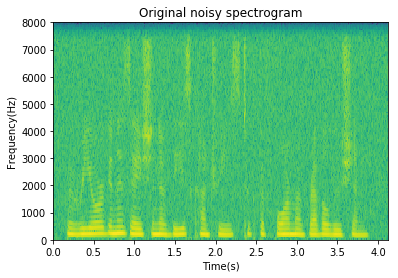

In [28]:
plt.specgram(y, Fs=fs);
plt.title('Original noisy spectrogram');
plt.xlabel('Time(s)');
plt.ylabel('Frequency(Hz)');

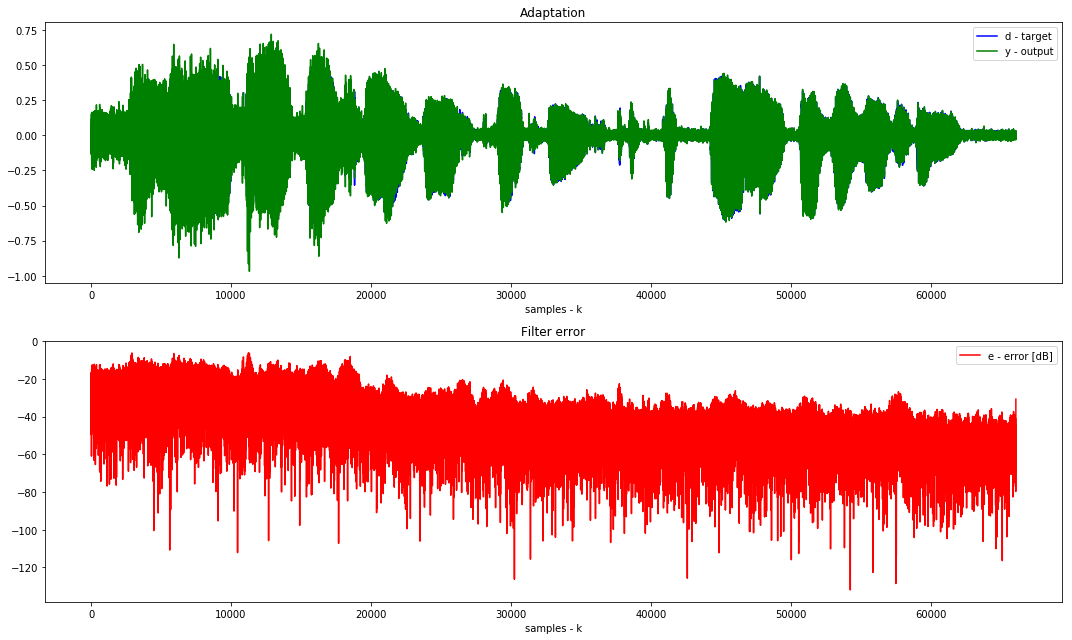

In [43]:
# creation of data
N = 100
delta = 10
x = pa.input_from_history(np.concatenate((np.zeros(delta,), y)), N)

# Create desired signal
d = np.zeros((x.shape[0],))
for i in range(1, x.shape[0]):
    d[i-1] = x[i][0]
# d = np.concatenate((y, np.zeros(delta,))) #pa.input_from_history(np.concatenate((y, np.zeros(delta,))), N)

# identification
f = pa.filters.FilterLMS(n=N, mu=0.1, w="random")
out, e, w = f.run(d, x)

# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(out,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10(e**2),"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()

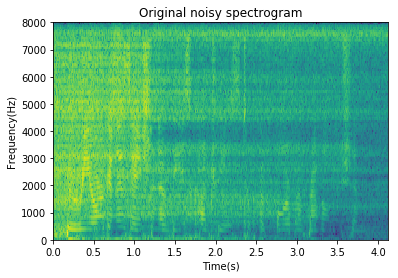

In [44]:
plt.specgram(e, Fs=fs);
plt.title('Original noisy spectrogram');
plt.xlabel('Time(s)');
plt.ylabel('Frequency(Hz)');

In [45]:
from IPython.display import Audio

Audio(data=e, rate=fs)